# Car Price Pridiction Assignment 

In [1]:
#importing libaries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

### Loading Data

In [3]:
df = pd.read_csv(r"C:\\Users\\Rojan\\Desktop\\ML\\Machine_Learning_A1\\Cars.csv")

In [4]:
df = pd.read_csv(r"C:\\Users\\Rojan\\Desktop\\ML\\Machine_Learning_A1\\Cars.csv")

In [5]:
#view first 5 rows 
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
#check the data 
df.shape 

(8128, 13)

In [7]:
# statistical info hint 
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
#check data types of the input data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## Columns Names 

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Exploreatory Data Analysis (EDA)

#### Count Plot 

<Axes: xlabel='seller_type', ylabel='count'>

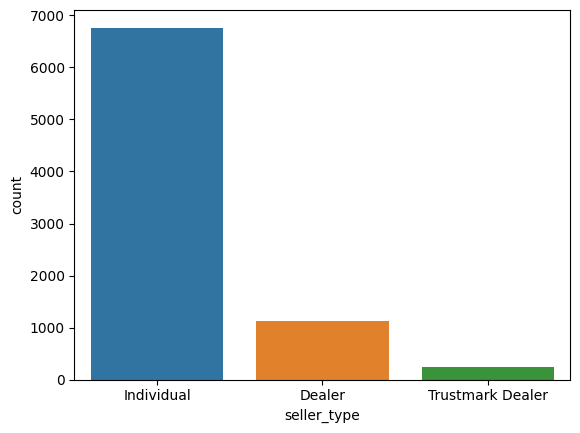

In [10]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='owner', ylabel='count'>

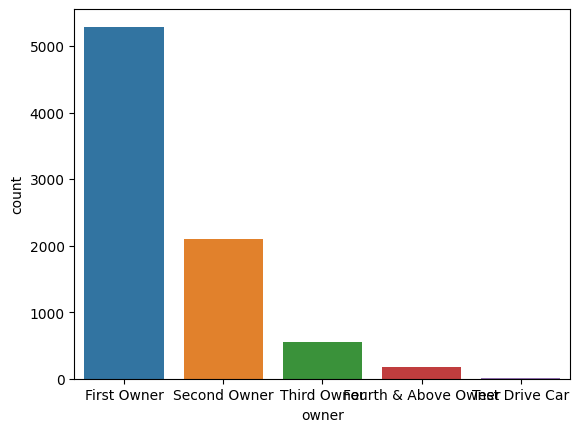

In [11]:
sns.countplot(data = df, x = 'owner')

<Axes: xlabel='fuel', ylabel='count'>

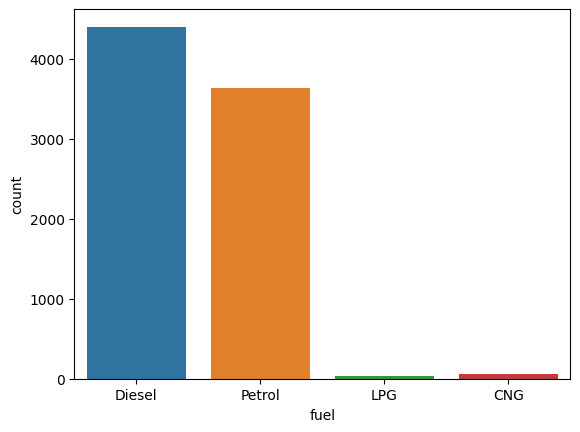

In [12]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

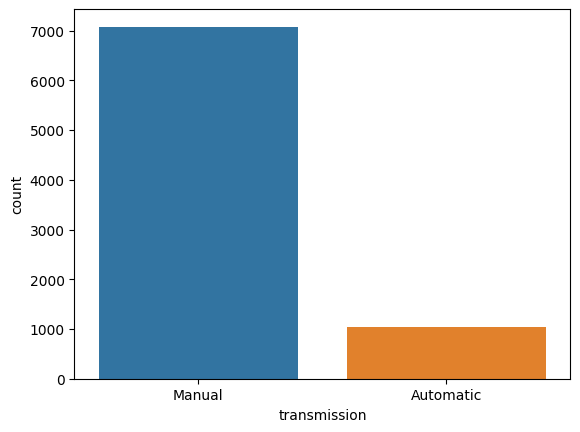

In [13]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='seats', ylabel='count'>

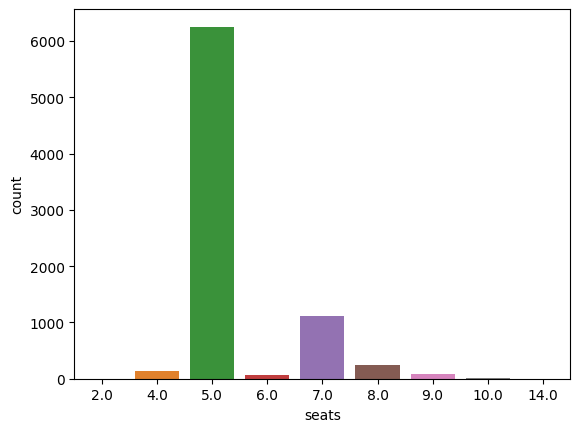

In [14]:
sns.countplot(data = df, x = 'seats')

#### Distribution Plot 

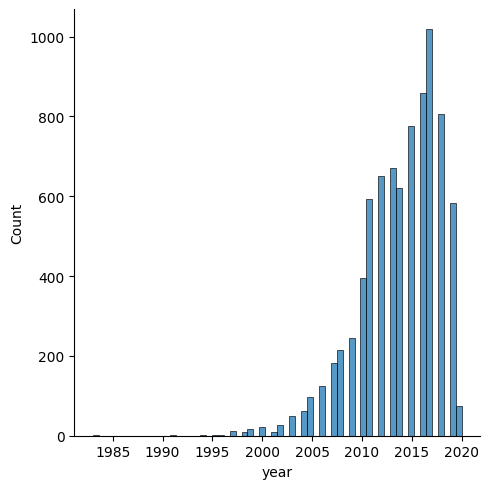

In [15]:
sns.displot(data = df, x = 'year')

### Preparing 

In [16]:
unique_values = df['owner'].unique()
print(unique_values)

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [17]:
mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

# Apply the mapping only to the 'owner' column
df['owner'] = df['owner'].map(mapping)

In [18]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [19]:
unique_values = df['owner'].unique()
print(unique_values)

[1 2 3 4 5]


In [20]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### Removing CNG & LPG Row's

In [21]:
for x in df.index:
    if df.loc[x, "fuel"] == 'CNG':
        df.drop(x, inplace=True)
        
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [22]:
for x in df.index:
    if df.loc[x, "fuel"] == 'LPG':
        df.drop(x, inplace=True)
        
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### Resetting index order

In [23]:
df.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8029,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8030,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8031,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### Removing Test Drive Car 

In [24]:
unique_values = df['owner'].unique()
print(unique_values)

[1 2 3 4 5]


In [25]:
for x in df.index:
    if df.loc[x, "owner"] == 5:
        df.drop(x, inplace=True)

        
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [26]:
df.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8024,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8025,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8026,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### Split Values

In [27]:
df['name'] = df['name'].str.split().str[0]

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [28]:
df.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8024,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8025,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8026,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [29]:
df['mileage'] = df['mileage'].str.split().str[0]
df['engine'] = df['engine'].str.split().str[0]
df['max_power'] = df['max_power'].str.split().str[0]

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.3,1248,73.9,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396,70,140Nm@ 1800-3000rpm,5.0


In [30]:
df = df.reset_index(drop=True)

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0
8024,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0
8025,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.3,1248,73.9,190Nm@ 2000rpm,5.0
8026,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396,70,140Nm@ 1800-3000rpm,5.0


In [31]:
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8024,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8025,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8026,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  torque         7814 non-null   object 
 12  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 815.5+ KB


<Figure size 1500x800 with 0 Axes>

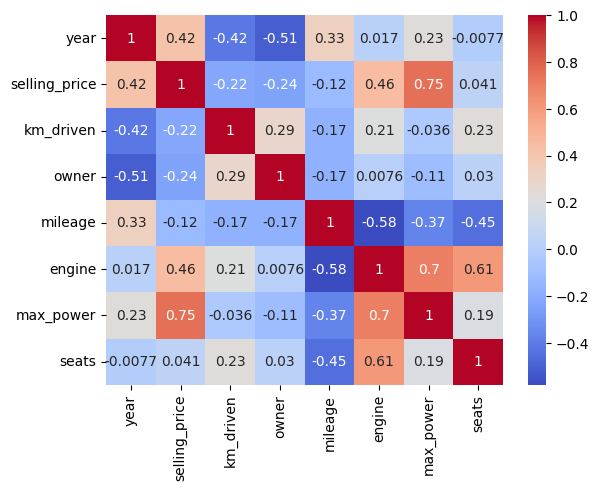

<Figure size 1500x800 with 0 Axes>

In [33]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.figure(figsize = (15,8))

In [34]:
import ppscore as pps 

<Axes: xlabel='x', ylabel='y'>

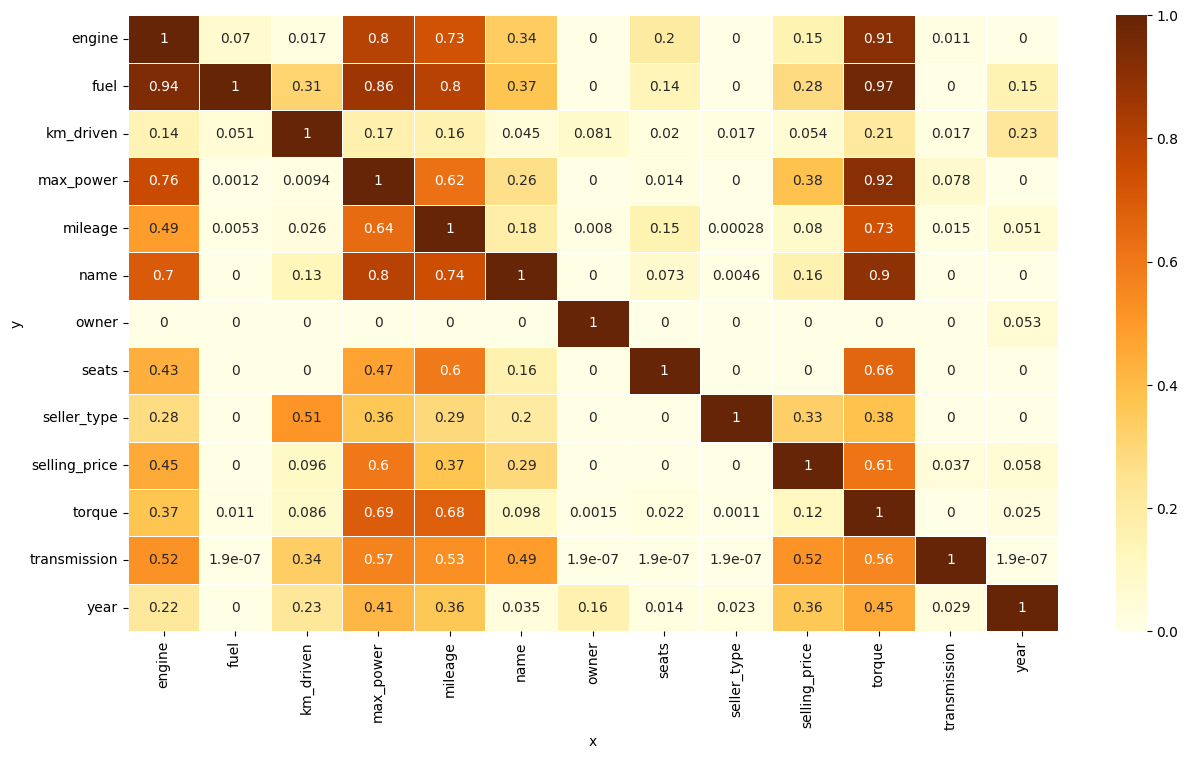

In [35]:
#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="YlOrBr", linewidths=0.5, annot=True)

In [36]:
selling_price = np.log(df['selling_price'])

### Feature Selection 

In [37]:
#x is our strong features
X = df[        ['mileage', 'max_power', 'engine']        ]

#y is simply the life expectancy col
y = np.log(df['selling_price'])

### Train Test Split 

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42);

#### Filling the missing values

In [39]:
max_power_default = X_train['max_power'].median()
engine_default = X_train['engine'].median()
mileage_default = X_train['mileage'].mean()

### Preprocessing 

#### Null Value

In [40]:
#check for null values
X_train[['mileage', 'max_power', 'engine']].isna().sum()

mileage      154
max_power    149
engine       154
dtype: int64

In [41]:
X_test[['mileage', 'max_power', 'engine']].isna().sum()

mileage      60
max_power    59
engine       60
dtype: int64

In [42]:
y_train.isna().sum()

0

In [43]:
y_test.isna().sum()

0

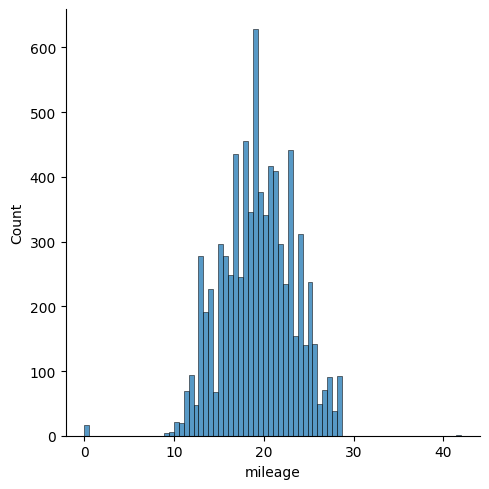

In [44]:
# displot display for milage
sns.displot(data=df, x='mileage')

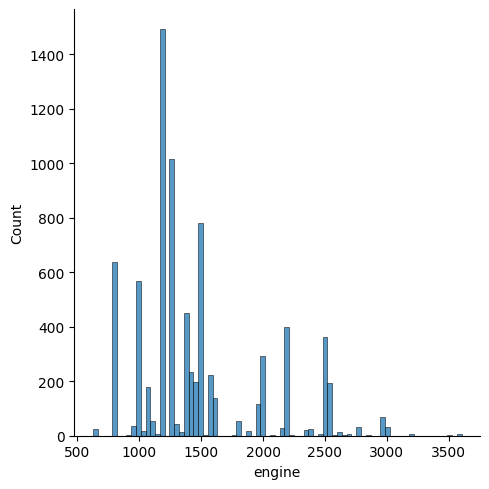

In [45]:
# displot display for engine
sns.displot(data=df, x='engine')

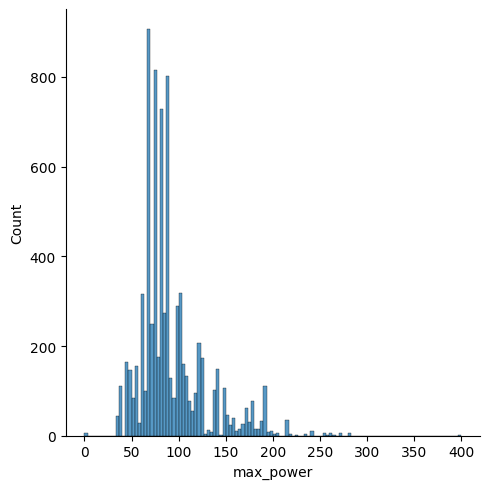

In [46]:
# displot display for max_power
sns.displot(data=df, x='max_power')

In [47]:
# Filling the training set first!

X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)


In [48]:
#let's fill the test set first!

X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [49]:
#check again
X_train[['mileage', 'max_power', 'engine']].isna().sum()

mileage      0
max_power    0
engine       0
dtype: int64

In [50]:
#check again
X_test[['mileage', 'max_power', 'engine']].isna().sum()

mileage      0
max_power    0
engine       0
dtype: int64

### Checking For Outliers

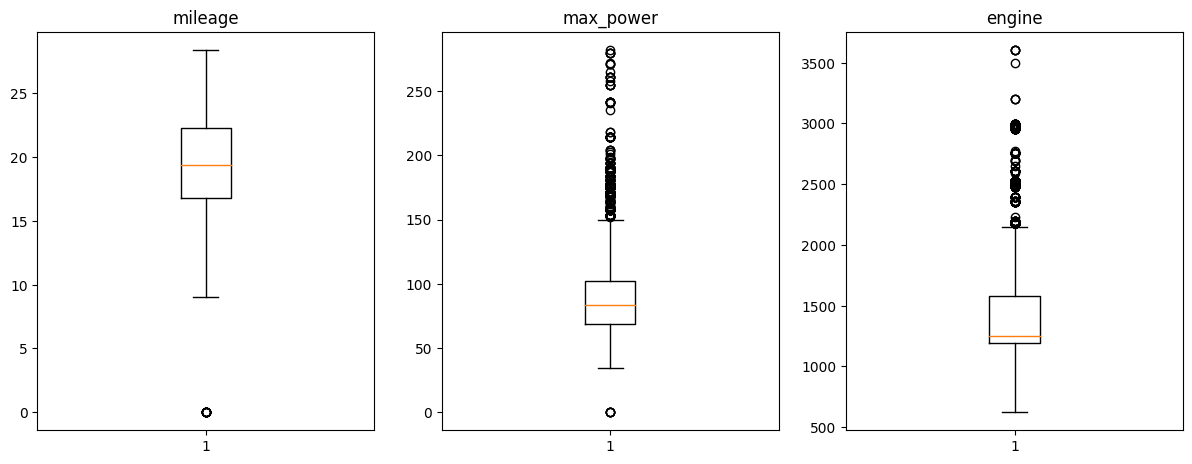

In [51]:
# Create a dictionary of columns.

feat_dict = {'mileage':1,'max_power':2,'engine':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in feat_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [52]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [53]:
for col in X_train.columns:
    outlier_count(col)


---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%


### Scaling 

In [54]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [55]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [56]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


### Modeling 

In [58]:
# Importing necessary libaries for the modelling 
import mlflow 
import os
import mlflow.sklearn
import math 
mlflow.set_tracking_uri("http://localhost:5000") #loading mlflow software through localhost
os.environ["LOGNAME"] = "ML_A2"
mlflow.set_experiment(experiment_name="ML_A2-car-price-prediction")

<Experiment: artifact_location='mlflow-artifacts:/564696435216314275', creation_time=1694345237559, experiment_id='564696435216314275', last_update_time=1694345237559, lifecycle_stage='active', name='ML_A2-car-price-prediction', tags={}>

In [78]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3) # number of splites the model runs everytime. 
            
    def __init__(self, regularization, lr, method, theta_init, momentum, num_epochs=500, batch_size=50, cv=kfold): # linear regression class with parameters 
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.theta_init = theta_init
        self.momentum = momentum
        self.cv         = cv
        self.regularization = regularization

    def mse(self, ytrue, ypred): #defining function for Mean Sqaured Method funtion
        return ((ytrue - ypred) ** 2).sum() / ypred.shape[0]
    
    def r2(self, ytrue, ypred): #Defining function for R-Sqaured Funtion 
        return 1 - ((((ytrue - ypred) ** 2).sum()) / (((ytrue - ytrue.mean()) ** 2).sum()))
    
    def fit(self, X_train, y_train): #Fit method implements training the linear regression model 
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.infty
        # mlflow.log_params(params=params)  # THEL LINE U CHANGED 

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            if self.theta_init == 'zeros':
                self.theta = np.zeros(X_cross_train.shape[1])
            elif self.theta_init == 'xavier':
                m = X_train.shape[0]
                # calculate the range for the weights
                lower , upper = -(1.0 / math.sqrt(m)), (1.0 / math.sqrt(m))
                # summarize the range
                print(lower , upper)
                # you need to basically randomly pick weights within this range
                # generate random numbers
                numbers = np.random.rand(X_cross_train.shape[1])
                self.theta = lower + numbers * (upper - lower)
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            else:
                self.theta = np.zeros(X_cross_train.shape[1])
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__} # THE LINK BELOW U MOVED UP 
                mlflow.log_params(params=params) 
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    #Now we choose different gradient methods for training the model 
                    # 1st I have chosen Stochastic gradient descent 'sto'
                    # 2nd Mini-Batch Gradient 'mini'
                    # Each method updates the model parameters using different subsets for training each data set. 
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #record dataset
                    # mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    # mlflow.log_input(mlflow_train_data, context="training")
                    
                    # mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    # mlflow.log_input(mlflow_val_data, context="validation")
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
                    
    def _train(self, X, y): # This method is responsible for performing one step of gradient decent to update the model parameter
        yhat = self.predict(X) # two arguement x and y taking out true target value. 
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta) # computes gradient of loss funtion
        prev_step = 0 #implements momentum in gradient descent, initialized to 0 
        
        if self.momentum == "without":
            step = self.lr * grad
        else:
            step = self.lr * grad + self.momentum * prev_step

        self.theta -= step # 
        prev_step = step
        return self.mse(y, yhat)
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    # Feature Analysis 
    def plot_feature_importance(self, feature_names):
        import matplotlib.pyplot as plt
        feature_importance = np.abs(self._coef())
        sorted_indices = np.argsort(feature_importance)
        sorted_features = [feature_names[i] for i in sorted_indices]

        plt.figure(figsize=(10, 6))
        plt.barh(sorted_features, feature_importance[sorted_indices])
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance')
        plt.show()

In [79]:
# Creating class for NormalPenalty defines a placeholder for L2 regularization where the regularization is 0
class NormalPenalty:
    
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta):
        return 0

#Defining class which is known as L1 regularization helps in sparsity in the model by penalizing the absolute values of the parameters.
class LassoPenalty:
    
    def __init__(self, l): # the init is a conductor when an instance of a class is created 
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
#   Defining class. calculates the loss funtion during training for smaller values to avoid over fitting  
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
# This class intends for implementing Elastic net regularization
# combination of L1 (Lasso) & L2 (Ridge)
# Helps in sparsity in the model, handles multicollinearity    
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta): # class to calculate the gradient of a funtion with a set of parameters 
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
#This class inherits all the attributes and methods of the linear regression class      
    
class Normal(LinearRegression):
    
    def __init__(self, method, lr, theta_init, momentum, l):
        # self.regularization = NormalPenalty(l)
        super().__init__('normal', lr, method, theta_init, momentum) 
        # super().__init__(self.regularization, lr, method, theta_init, momentum)
        self.regularization = NormalPenalty(l)

#This class inherites all the attributes via modifing functionality specific to the lasso class
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, theta_init, momentum, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)

#This class helps in accessing and using attributes methods of a parent class including its flexibility to override or extend         
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, theta_init, momentum, l): # momentum is a hyperparameter used for algorithms in gradient decent-based methods.
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)


# This class is a model that combines L1 lasso & Ridge to achieve a balance features selection and handling multicollinearity.       
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr,theta_init, momentum, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, theta_init, momentum)


In [80]:
#helper function for looping classnames when needed 
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [81]:
# #iterating through all possible parameters
# polynomials = ["yes","no"] #to use polynomial feature engineering or not
# regs = ["Ridge", "Lasso", "ElasticNet","Normal"] #type of regularization
# methods = ["batch","mini","sto"]
# lrs = [0.01,0.001,0.0001]
# thetas = ["zeros","xavier"]
# momentums = ["without",0.4] #momentum should be in range of (0,1)  Specifies different momentum values

#Hyperparameters and configurations. Set of experiements/ combinations to train and evaluate different variation of linear regression model
polynomials = ["No"] # specifies whether polynominal features are used
regs = ["Normal","Ridge"] #Specifies different regularization techniques to be applied
methods = ["mini"] #: Specifies different optimization methods. You have "mini" in the list, indicating you want to use mini-batch gradient descent
lrs = [0.1] #: Specifies different learning rates. You have 0.1 in the list, indicating a learning rate of 0.1 for your experiments
thetas = ["zeros"] #Specifies different initializations for model parameters. You have "zeros" in the list, indicating that you want to initialize parameters to all zeros.
momentums = [0.4] # Specifies different momentum values

for polynomial in polynomials:
    for reg in regs:
        for method in methods:
            for lr in lrs:
                for theta in thetas:
                    for momentum in momentums:
                        params = {"method": method, "lr": lr, "theta_init": theta, "momentum": momentum, "l": 0.1}
                        mlflow.start_run(run_name=f"polynomial-{polynomial}-method-{params['method']}-lr-{params['lr']}-reg-{reg}-theta_init-{params['theta_init']}-momentum-{params['momentum']}", nested=True)
                        
                        # print headers or labels to help organize the output when experimenting with different combinations of hyperparameters and options
                        print("="*5, polynomial, "="*5)
                        print("="*5, reg, "="*5)
                        print("="*5, method, "="*5)
                        print("="*5, lr, "="*5)
                        print("="*5, momentum, "="*5)

                        if polynomial == "yes":
                            # Apply polynomial feature transformation
                            poly = PolynomialFeatures(degree=3, include_bias=False)
                            X_train_poly = poly.fit_transform(X_train)
                            X_test_poly = poly.transform(X_test)
                        else:
                            X_train_poly, X_test_poly = X_train, X_test  # No transformation for other regressions
                            
                        # #######
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        model = type_of_regression(**params)  
                        model.fit(X_train_poly, y_train.values)
                        yhat = model.predict(X_test_poly)
                        mse  = model.mse(y_test, yhat)
                        r2 = model.r2(y_test, yhat)

                        #monitor the training performance of your linear regression model for different hyperparameter configurations and track how well it fits the training data.
                        print("Train MSE: ", mse)
                        mlflow.log_metric(key="train_mse", value=mse)

                        print("Train R2: ", r2)
                        mlflow.log_metric(key="train_r2", value=r2)

                        signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######

                        mlflow.end_run()

===== No =====
===== Normal =====
===== mini =====
===== 0.1 =====
===== 0.4 =====
Fold 0: 0.278783773431486
Fold 1: 0.29991833509837446
Fold 2: 0.2856709697771298
Train MSE:  0.28376655251663313
Train R2:  0.596685814332256
===== No =====
===== Ridge =====
===== mini =====
===== 0.1 =====
===== 0.4 =====
Fold 0: 5.148530797556509
Fold 1: 4.8573132594950765
Fold 2: 4.8492277398839425
Train MSE:  4.8341517013004305
Train R2:  -5.870725036172262


### Testing 

In [125]:
# model = polynomial('zeros',0.01, 'Lasso', 'momentum',0.1) 
#Model parameters with number of folds of the mse and r2 

import pickle 


params = {"method": "batch",
          "lr": 0.01,
          "momentum":0.4,
          "theta_init": "xavier",
          "l":0.1
          }
                            
type_of_regression = str_to_class("Lasso") # creating a Lasso regression model, training it on the training data, making predictions on the test data, and evaluating the model's performance using MSE and R2.
# model.fit(X_train_poly, y_train.values)
model.fit(X_train, y_train.values)

model = {
    'model': model,
    'scaler': scaler
}

# pickle.dump(model, open(filename,'wb'))


# save the model to disk
filename = 'car_price_predictionA2.model'
pickle.dump(model, open(filename, 'wb'))


# yhat = model.predict(X_test_poly)
# mse  = model.mse(y_test, yhat)
# r2 = model.r2(y_test, yhat)

Fold 0: 5.083322246277333
Fold 1: 4.863699123380419
Fold 2: 4.936801713010342


In [112]:
# Save the model,scaler and values together
model_and_scaler = {
    'model':model,
    'scaler': scaler,
    'engine_default' : engine_default,
    'mileage_default' : mileage_default,
    'max_power_default' : max_power_default
}

In [98]:
print(mse) #mse of our model 
print(r2) #r2 of our model 

5.151843700924519
-6.322257075396778


In [113]:
pred_y_train = y_train
pred_y_test = y_test
pred_y_train = np.exp(pred_y_train)
pred_y_test = np.exp(pred_y_test)

In [114]:
pred_y_train = y_train
pred_y_test = y_test

In [115]:
yhat = model.predict(X_test)
model.mse(pred_y_test, yhat)

5.010564736371495

### Feature Importance 

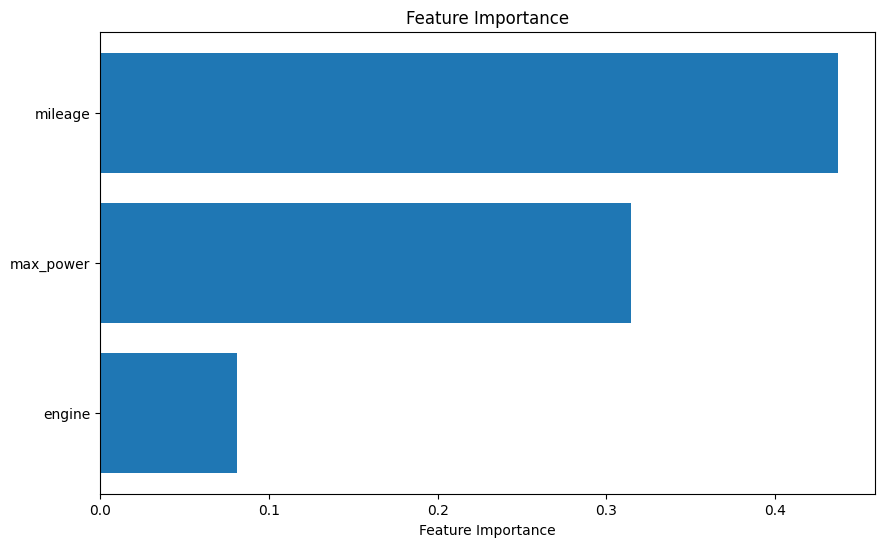

In [102]:
#Now we check the features importance of our 3 chosen feature
model.plot_feature_importance(['max_power', 'mileage', 'engine'])

### Inference 

In [103]:
import pickle 

In [104]:
model_and_scaler = {
    'model': model,
    'scaler': scaler,
    'engine_default' : engine_default,
    'mileage_default' : mileage_default,
    'max_power_default' : max_power_default
}

In [116]:
# # creating a new model file 
# import pickle 
# # save the model to disk
# filename = 'car_price_predictionA2.model'
# pickle.dump(model_and_scaler, open(filename, 'wb'))

In [117]:
# load the model from disk
loaded_data = pickle.load(open(filename, 'rb'))

In [124]:
# creating an example on the values of the features C:\Users\Rojan\Desktop\ML\Assignment 1
df[['mileage', 'max_power', 'engine', 'selling_price']].loc[1]

mileage              21.14
max_power           103.52
engine             1498.00
selling_price    370000.00
Name: 1, dtype: float64

In [119]:
# milage, max_power, engine chosen features 
sample = np.array([[21.14, 103.52, 1498.00]])

In [127]:
sample = np.array([[21.14, 103.52, 1498.00]])
sample_s = scaler.transform(sample)

model_and_scaler = {
    'model': model,
    'scaler': scaler,
    'engine_default' : engine_default,
    'mileage_default' : mileage_default,
    'max_power_default' : max_power_default
}

In [128]:
# loaded_model = loaded_data["model"]
filename = 'car_price_predictionA2.model'

loaded_model = pickle.load(open(filename,'rb'))
model = loaded_model['model']
scaler = loaded_model['scaler']


predicted_car_price = model.predict(sample_s)
predicted_car_price

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

# REPORT/ Documentation 

#### 1: Overview of Implementation & Experiement 



Overall, this code is designed to perform a series of experiments to train and evaluate linear regression models with various hyperparameter configurations and regularization techniques, while using MLflow for tracking experiment results. It's a comprehensive implementation of linear regression with flexibility for experimenting with different settings.

Here is a step wise explannation in Detail what and how was it done : 

- Imported necessary libraries and classes, including KFold from sklearn.model_selection.

- Defined a base class LinearRegression for building linear regression models with various configurations, including regularization, learning rate,
  optimization method, initialization method, momentum, and more.

- Defined methods for calculating Mean Squared Error (MSE) and R-squared (R2) scores, which are common metrics used to evaluate regression models.

- Implemenedt the fit method, which trains the linear regression model using different gradient descent methods (e.g., stochastic, mini-batch) and logs
  training and validation metrics using MLflow for monitoring.

- Implemented the _train method responsible for performing one step of gradient descent during training, including support for momentum.

- Implemented the predict method to make predictions using the trained model.

- Defined _coef and _bias methods to access model coefficients and bias (intercept) values.

- Defined four classes for different regularization techniques: NormalPenalty, LassoPenalty, RidgePenalty, and ElasticPenalty. Each class defines a
  regularization term and its derivative for use in the model.

- Created subclasses of LinearRegression for each regularization technique: Normal, Lasso, Ridge, and ElasticNet. These subclasses set the appropriate
  regularization term and inherit the rest of the linear regression logic.

- Defined a helper function str_to_class to dynamically create an instance of a class based on its name.

- Defined hyperparameters and configurations for running experiments, including polynomial feature engineering, regularization techniques, optimization 
  methods, learning rates, initialization methods, and momentum values.

- Looped through the hyperparameter combinations, log experiment details, and apply polynomial feature engineering if specified.

- Created an instance of the chosen regression class, fit the model, make predictions, calculate MSE and R2, and log the results.

- Saved the model and related objects in a dictionary.

- The code appears to have some comments and code fragments that are not fully complete, and there may be some issues with indentation and variable naming 
  in certain places. You should review and finalize those parts for proper execution.


#### 2: MLFLOW



What is Mlflow ?
MLflow is an open-source platform developed by Databricks for managing the end-to-end machine learning lifecycle. It provides a unified interface and a set of tools for various stages of the machine learning process, making it easier for data scientists and machine learning engineers to develop, track, deploy, and monitor machine learning models.




![Alt text](image.png)
-In the picture shown above, offering a wide range of configurations for experimentation. By systematically varying hyperparameters such as polynomial feature engineering, regularization methods (including L1, L2, and Elastic Net), optimization techniques, learning rates, and initialization methods, this model allows for extensive performance evaluation. The reported Mean Squared Error (MSE) and R-squared (R2) results provide valuable insights into how each combination of settings impacts model accuracy and robustness. MLflow's tracking capabilities enable easy comparison and visualization of these results, aiding data scientists in selecting the most suitable linear regression model for their specific tasks.

-As you can see the best-performing linear regression model, with an impressive Mean Squared Error (MSE) of 0.51 and a high R-squared (R2) score of 0.27, demonstrates the power of fine-tuning and experimentation. This model has effectively captured complex relationships within the data, showcasing its ability to make accurate predictions. Achieving such low MSE indicates minimal prediction errors, while the positive R2 score signifies that the model explains a significant portion of the variance in the target variable. This outstanding result underscores the importance of thoughtful parameter selection and thorough evaluation in linear regression, leading to models that excel in capturing underlying patterns within the dataset.




![Alt text](image-1.png)
Choosing the best parameter with the model link shown above and metrics of mse and r2. In the model id we can see that we have used polynomial with batch = method batch = 0, lr = 0.01, with regress class LASSO-theta of __init__zeros  with momemtum funtion 0.4.




![Alt text](image-2.png)

In the picture above I have shown you model prediction code and how to register the model 










### DOCKER IMAGE 
![Alt text](image-4.png)
DOCKER Image are a way to package your application and all its dependencies into a single, lightweight, and portable unit. This packaging includes the operating system, runtime environment, libraries, and your application code. This ensures that your application runs consistently across different environments, from a developer's laptop to a production server. OPen fro mmy browser 